In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt

# Load the data

In [2]:
df = pd.read_pickle("../data/export.pkl")
n = df.shape[0]

In [3]:
df.columns

Index(['id', 'title', 'description_short', 'paper___citation', 'paper___url',
       'paper___year', 'participants___male', 'participants___female',
       'participants___total', 'participants___white', 'participants___black',
       'participants___latino', 'participants___asian', 'paper___raw_text',
       'description', 'info___mdcalc_url', 'categorization___type',
       'title_short', 'info___before_use', 'info___instructions',
       'info___keywords', 'categorization___chief_complaint',
       'categorization___specialty', 'categorization___purpose',
       'categorization___system', 'categorization___disease',
       'features_names_raw', 'features_names', 'paper___author_names',
       'paper___author_affiliations', 'paper___author_genders',
       'paper___author_countries', 'info___related_calc_ids',
       'info___additional_references', 'info___usage___use_case',
       'info___usage___why_use', 'info___usage___notes',
       'info___next_steps___advice', 'info___next_ste

In [4]:
def id_to_idx(id, df):
    return np.where(df.id == id)[0]


sims = np.zeros((n, n))
for r, row in tqdm(df.iterrows()):
    ids = row["info___related_calc_ids"]
    for id in ids:
        c = id_to_idx(id, df)
        sims[r, c] += 1

    for c, col in df.iterrows():
        for key in [
            "categorization___chief_complaint",
            "categorization___specialty",
            "categorization___purpose",
            "categorization___system",
            "categorization___disease",
        ]:
            if row[key] == col[key]:
                sims[r, c] += 1


# average values across the diagonal
sims = (sims + sims.T) / 2

# set diagonal to 1
np.fill_diagonal(sims, max(sims))

0it [00:00, ?it/s]

690it [00:22, 31.01it/s]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

/home/chansingh/imodelsx/.venv/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/chansingh/imodelsx/.venv/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


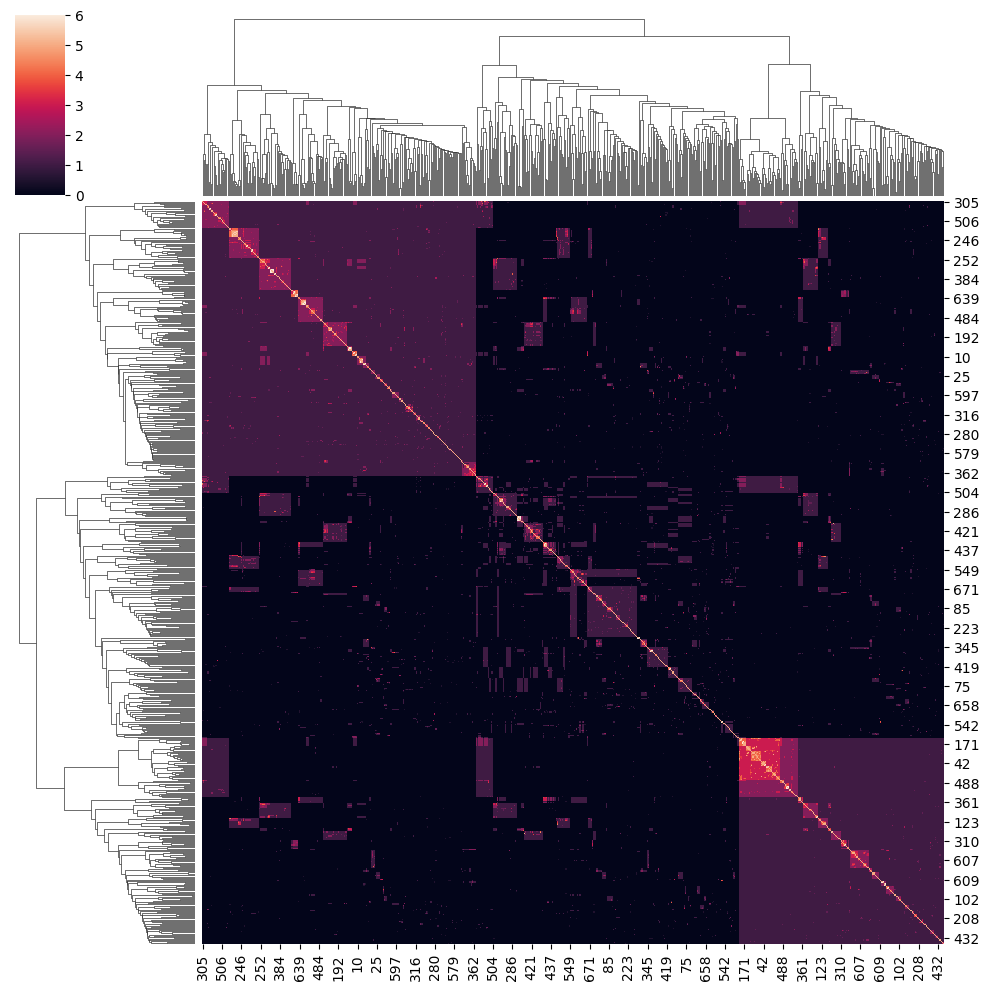

In [58]:
sns.clustermap(sims)